<h2>The classificationt task below is the prediction fo customer satisfaction </h2>

In [1]:
#Read in your model
df = pd.read_csv('python/udacity_project/Gary/customer_satisfaction/train.csv')

In [2]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
df['TARGET'].value_counts(dropna = False)

0    73012
1     3008
Name: TARGET, dtype: int64

In [4]:
df.shape

(76020, 371)

In [5]:
#balance the dataset

In [6]:
x = df.drop('TARGET', axis = 1)

In [7]:
y = df['TARGET']

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.utils import resample
from sklearn.metrics import auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [9]:
#train test split your dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [10]:
sample = pd.concat([x_train, y_train], axis = 1)

In [11]:
sample['TARGET'].value_counts()

0    58449
1     2367
Name: TARGET, dtype: int64

In [12]:
#split the dataset into high and lower class
high_class = sample[sample['TARGET'] == 0]
low_class = sample[sample['TARGET'] == 1]

In [13]:
#upsampling algorithm 
upsampled_class = resample(low_class, replace = True, n_samples = len(high_class), random_state = 40)

In [14]:
#downsampling algorithm
downsampled_class = resample(high_class, replace = False, n_samples = len(low_class), random_state = 40)

In [15]:
df_sampled = pd.concat([high_class, upsampled_class])

In [16]:
#check to see if both classes have been balanced
df_sampled['TARGET'].value_counts()

1    58449
0    58449
Name: TARGET, dtype: int64

In [17]:
df_sampled = df_sampled.sample(10000)

In [18]:
x_train = df_sampled.drop('TARGET', axis = 1)
y_train = df_sampled['TARGET']

In [19]:
#reshape the target variable 
#y_train = np.array(y_train).reshape(-1,1)

In [20]:
x_train.shape, y_train.shape 

((10000, 370), (10000,))

In [21]:
df_sampled

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
59685,119130,2,30,0.0,0.00,59.97,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113173.800000,1
3380,6773,2,38,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94233.150000,1
24300,48629,2,46,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25737.480000,1
27719,55483,2,25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48615.930000,0
59864,119523,71,46,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103659.960000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52510,104832,2,31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,1
12157,24361,2,34,0.0,626.79,1272.93,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92167.410000,0
74167,148148,2,56,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61961.190000,1
12838,25719,2,36,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88898.700000,1


In [22]:
#feature selection module
from sklearn.feature_selection import chi2, SelectKBest

In [23]:
#instantiate it 
#sk = SelectKBest(chi2, k = 20).fit(x_train, y_train)

<h2>Preprocessing Step:  Transform your instances  </h2>

In [24]:
#tune the hyperparameters 
Gridsearch = GridSearchCV(LogisticRegression(), {'penalty': ['l1', 'l2'], 'C': np.arange(0.01,1, 0.01)}, scoring = 'f1', cv = 3) 

In [25]:
Gridsearch.fit(x_train, y_train) 

C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty

C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty

C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty

C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.01, 0.02, 0.03, 0.0...
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88

In [26]:
print('best estimators ', Gridsearch.best_estimator_)

best estimators  LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [27]:
print('best parameters ', Gridsearch.best_params_)


best parameters  {'C': 0.01, 'penalty': 'l2'}


In [28]:
print('best score ', Gridsearch.best_score_)

best score  0.3689076903260624


In [29]:
coef = Gridsearch.best_estimator_.coef_

In [30]:
#total number of features are: 
coef.size

370

In [31]:
#total number of features with non-zero coefficients 
np.count_nonzero(coef)

262

In [32]:
#time to select only the relevant features
useful_features = []

for i in range(len(coef.flatten())):
    if coef.flatten()[i] != 0: 
        useful_features.append(df_sampled.columns[i])

In [33]:
#here, we can now print out the useful coefficients 
print(useful_features)

['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_v

In [87]:
#Time to fit the model 
lr = LogisticRegression(C = 0.87, penalty = 'l2', solver = 'liblinear', n_jobs=-1)

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score
from sklearn.impute import SimpleImputer

In [89]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean', verbose= 0)#.fit(x_train).transform(x_train)
#x_test = SimpleImputer(missing_values = np.nan, strategy = 'mean').fit(x_test).transform(x_test)

In [90]:
#imp = SimpleImputer(missing_values = 'NaN', strategy = 'mean')

In [91]:
steps = [('scale', StandardScaler()), ('imputer', imp), ('logreg', lr)]

In [92]:
#isntantiate the pipeline 
pipeline = Pipeline(steps)

In [111]:
clf = pipeline.fit(x_train, y_train)

C:\Users\Theophine\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [116]:
#saving your model

import pickle

with open('Python/machine_learning_models/model.pkl', 'wb') as file: 
    pickle.dump(clf, file = file)

In [122]:
#using your model 

with open('Python/machine_learning_models/model.pkl', 'rb') as file: 
    pipeline1 = pickle.load(file)

In [123]:
#predict probabilities of occurance 
y_pred_proba = pipeline1.predict_proba(x_test)

In [124]:
#predict the outcome of the instances using a label
[s[1] > 0.4 for s in y_pred_proba] == pipeline1.predict(x_test)

array([ True,  True,  True, ...,  True,  True,  True])

In [127]:
#predict the outcome of the instances 
#y_pred = pipeline.predict(x_test)

In [128]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, [s[1] > 0.4 for s in y_pred_proba])

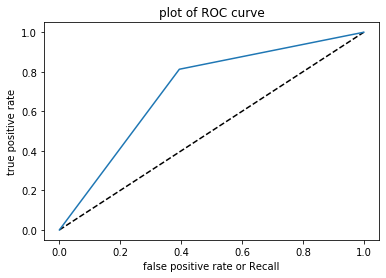

In [129]:
plt.plot([0,1], [0,1], 'k--');
plt.plot(fpr, tpr, label = 'Logistic Regression');
plt.xlabel('false positive rate or Recall');
plt.ylabel('true positive rate')
plt.title('plot of ROC curve')
plt.show()

In [130]:
#the area under the curve (AUC) is
roc_auc_score(y_test, [s[1] > 0.6 for s in y_pred_proba])

0.730505727816835

In [131]:
y_pred = pipeline1.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.6855432780847146


In [132]:
print(precision_score(y_test, y_pred))

0.09522878373093469


In [133]:
print(recall_score(y_test, y_pred))

0.7597503900156006


In [134]:
cf_matrix = confusion_matrix(y_test, [s[1] > 0.4 for s in y_pred_proba])
cf_matrix

array([[8825, 5738],
       [ 120,  521]], dtype=int64)

In [104]:
tp, fp, tn, fn = confusion_matrix(y_test, [s[1] > 0.4 for s in y_pred_proba]).flatten()

In [105]:
cf_matrix_new = confusion_matrix(y_test, y_pred)
tp, fp, tn, fn = cf_matrix_new.ravel()
tp, fp, tn, fn

(9936, 4627, 154, 487)

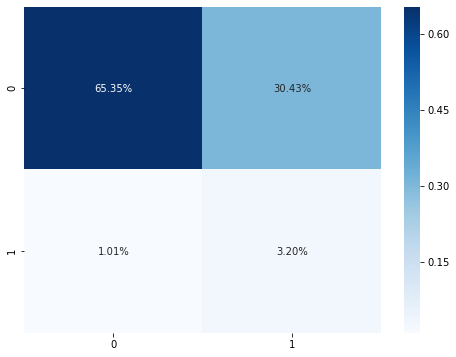

In [106]:
#print the confustion matrix
cf_matrix = confusion_matrix(y_test, y_pred);

plt.figure(figsize = (8, 6))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

In [107]:
#print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.81     14563
           1       0.10      0.76      0.17       641

    accuracy                           0.69     15204
   macro avg       0.54      0.72      0.49     15204
weighted avg       0.95      0.69      0.78     15204



<h2> Cost Minimization </h2>

In [108]:
def cost(y_test, fp_cost = 10, fn_cost = 0):
    fp, tp, fn, tn = confusion_matrix(y_test, [s[1] > 0.6 for s in y_pred_proba]).ravel()
    return ((fp_cost * fp) + (fn_cost * fn))

In [109]:
print('The true cost to company X is {:.2f} given the threshold'.format(cost(y_test)))

The true cost to company X is 120300.00 given the threshold
